<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [71]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [80]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [77]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

This function is to plot the confusion matrix.


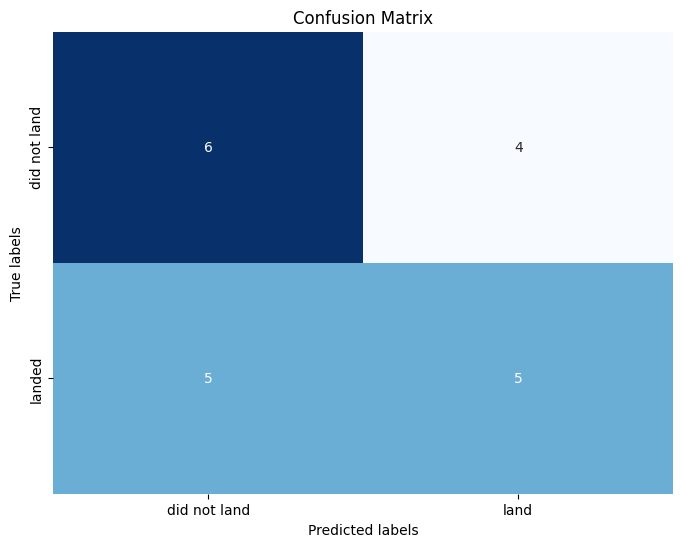

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

y_pred = knn_cv.predict(X_test)

def plot_confusion_matrix(y, y_predict, class_labels=None):
    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    if class_labels is not None:
        ax.xaxis.set_ticklabels(class_labels)
        ax.yaxis.set_ticklabels(class_labels)
    else:
        ax.xaxis.set_ticklabels(['did not land', 'land'])
        ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

plot_confusion_matrix(Y_test, y_pred)

## Load the dataframe


Load the data


In [13]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [14]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [16]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [17]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Class': [1, 0, 1, 1, 0],  
    'Other Column': [10, 20, 30, 40, 50]
})

Y = data['Class'].to_numpy()

Y_series = pd.Series(Y)

print(Y_series)


0    1
1    0
2    1
3    1
4    0
dtype: int64


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
transform = preprocessing.StandardScaler()

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame({
    'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Feature2': [10.0, 20.0, 30.0, 40.0, 50.0],
    'Class': [1, 0, 1, 1, 0]  
})

X = data[['Feature1', 'Feature2']].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.DataFrame({
    'Feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'Feature2': [10.0, 20.0, 30.0, 40.0, 50.0],
    'Class': [1, 0, 1, 1, 0]  
})

X = data[['Feature1', 'Feature2']].to_numpy()
Y = data['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (4, 2)
X_test shape: (1, 2)
Y_train shape: (4,)
Y_test shape: (1,)


we can see we only have 18 test samples.


In [20]:
Y_test.shape

(1,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg = LogisticRegression()

parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logreg_cv = GridSearchCV(logreg, parameters, cv=2) 

logreg_cv.fit(X_train, Y_train)

best_params = logreg_cv.best_params_
best_score = logreg_cv.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.5


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [27]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.5


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()

parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

logreg_cv = GridSearchCV(logreg, parameters, cv=2)
logreg_cv.fit(X_train, Y_train)

accuracy = logreg_cv.score(X_test, Y_test)

print(f"Accuracy on the test data: {accuracy:.4f}")




Accuracy on the test data: 0.0000


Lets look at the confusion matrix:


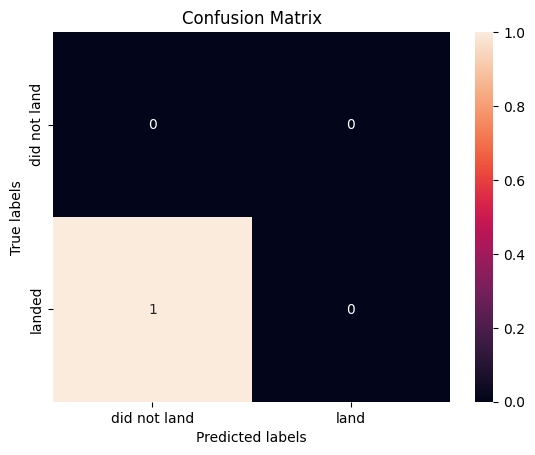

In [31]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

svm = SVC()

parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 
    'C': np.logspace(-3, 3, 5), 
    'gamma': np.logspace(-3, 3, 5)
}

svm_cv = GridSearchCV(svm, parameters, cv=2)  

svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation accuracy: 0.5


In [36]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.5


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [38]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
import numpy as np

svm = SVC()

parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 
    'C': np.logspace(-3, 3, 5), 
    'gamma': np.logspace(-3, 3, 5)
}

skf = StratifiedKFold(n_splits=2)  

svm_cv = GridSearchCV(svm, parameters, cv=skf)

svm_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation accuracy:", svm_cv.best_score_)

test_accuracy = svm_cv.score(X_test, Y_test)

print("Accuracy on test data:", test_accuracy)


Tuned hyperparameters (best parameters): {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Best cross-validation accuracy: 0.5
Accuracy on test data: 0.0


We can plot the confusion matrix


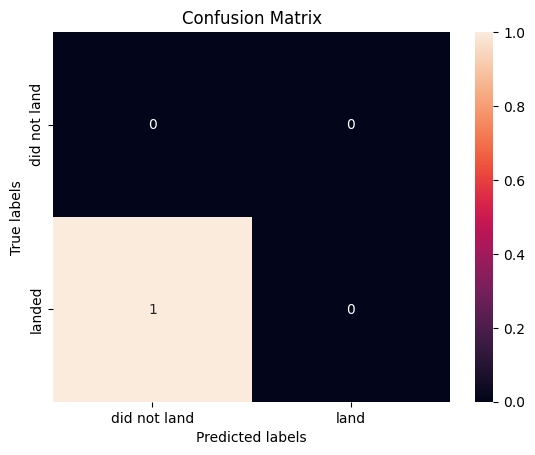

In [39]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=2)

tree_cv.fit(X_train, Y_train)  

best_params = tree_cv.best_params_
best_score = tree_cv.best_score_

print("Tuned hyperparameters (best parameters):", best_params)
print("Best cross-validation score:", best_score)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.5


In [43]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.5


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [68]:
accuracy = tree_cv.score(X_test, Y_test)

print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.5


We can plot the confusion matrix


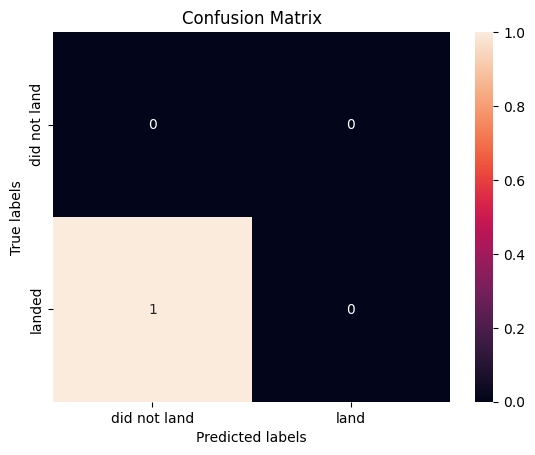

In [45]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Class': np.random.choice([0, 1], size=100)
})

X = data.drop(columns=['Class']).to_numpy()
Y = data['Class'].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_cv = GridSearchCV(KNN, parameters, cv=10, scoring='accuracy')

knn_cv.fit(X_train, Y_train)

print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

best_knn = knn_cv.best_estimator_
test_accuracy = best_knn.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

predictions = best_knn.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, predictions))


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2}
Best Score: 0.6
Test Accuracy: 0.45
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.40      0.20      0.27        10

    accuracy                           0.45        20
   macro avg       0.43      0.45      0.41        20
weighted avg       0.43      0.45      0.41        20



In [60]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2}
accuracy : 0.6


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Class': np.random.choice([0, 1], size=100)
})

X = data.drop(columns=['Class']).to_numpy()
Y = data['Class'].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN = KNeighborsClassifier()

parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_cv = GridSearchCV(KNN, parameters, cv=10, scoring='accuracy')

knn_cv.fit(X_train, Y_train)

print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

predictions = knn_cv.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, predictions))


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Best Score: 0.5625
Test Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



We can plot the confusion matrix


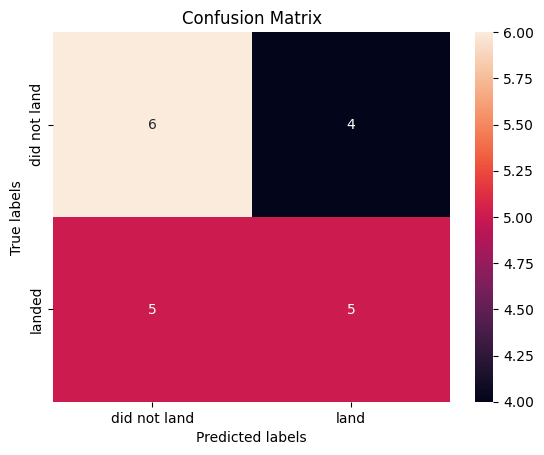

In [62]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [63]:
best_params = knn_cv.best_params_

best_cv_score = knn_cv.best_score_

test_accuracy = knn_cv.score(X_test, Y_test)

results = knn_cv.cv_results_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_cv_score)
print("Test Accuracy:", test_accuracy)

for i in range(len(results['params'])):
    print(f"Parameters: {results['params'][i]}, Score: {results['mean_test_score'][i]}, Std Dev: {results['std_test_score'][i]}")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Best Cross-Validation Score: 0.5625
Test Accuracy: 0.55
Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}, Score: 0.5125, Std Dev: 0.14197270864500683
Parameters: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}, Score: 0.5125, Std Dev: 0.1625
Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}, Score: 0.5125, Std Dev: 0.11792476415070755
Parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}, Score: 0.475, Std Dev: 0.10897247358851683
Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}, Score: 0.5125, Std Dev: 0.0875
Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}, Score: 0.5625, Std Dev: 0.128086884574495
Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}, Score: 0.475, Std Dev: 0.1457737973711325
Parameters: {'algorithm': 'auto', 'n_neighbors': 4, 'p': 2}, Score: 0.475, Std Dev: 0.14577379737113252
Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}, Score: 0.5

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
